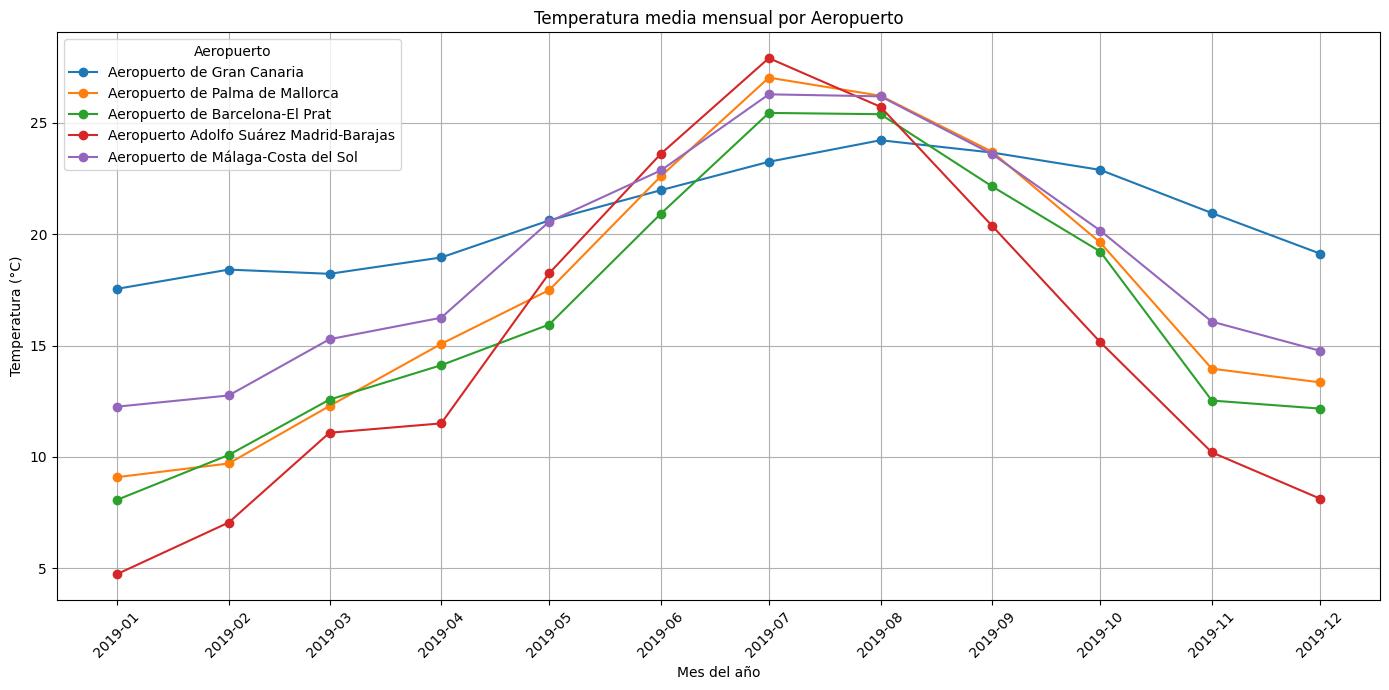

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Nombres de los archivos y aeropuertos con nombres completos para la leyenda
files = {
    'GCLP': 'GCLP_All.csv',
    'LEPA': 'LEPA_All.csv',
    'LEBL': 'LEBL_All.csv',
    'LEMD': 'LEMD_All.csv',
    'LEMG': 'LEMG_All.csv'
}

airport_names = {
    'GCLP': 'Aeropuerto de Gran Canaria',
    'LEPA': 'Aeropuerto de Palma de Mallorca',
    'LEBL': 'Aeropuerto de Barcelona-El Prat',
    'LEMD': 'Aeropuerto Adolfo Suárez Madrid-Barajas',
    'LEMG': 'Aeropuerto de Málaga-Costa del Sol'
}

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Iterar sobre cada archivo
for airport_code, file_name in files.items():
    # Cargar los datos
    data = pd.read_csv(file_name, low_memory=False)
    
    # Convertir columnas de fecha
    data['dateTime'] = pd.to_datetime(data['dateTime'])
    
    # Crear una columna 'YearMonth' para agrupar los datos por mes
    data['YearMonth'] = data['dateTime'].dt.to_period('M').dt.to_timestamp()
    
    # Filtrar datos para asegurarse que la temperatura no sea nula y agrupar por 'YearMonth'
    temperature_data = data[['YearMonth', 'temperature']].dropna()
    monthly_temperature = temperature_data.groupby('YearMonth').mean().reset_index()
    
    # Crear un gráfico de líneas para cada aeropuerto con su nombre completo
    plt.plot(monthly_temperature['YearMonth'], monthly_temperature['temperature'], marker='o', linestyle='-', label=airport_names[airport_code])

# Configurar el formato del eje X para mostrar todos los meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.title('Temperatura media mensual por Aeropuerto')
plt.xlabel('Mes del año')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend(title='Aeropuerto')
plt.tight_layout()
plt.show()
